## Stock portfolio optimization using python

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snss
import statsmodels.api as sm
import pandas_datareader
import datetime
import pandas_datareader.data as web
import pandas_datareader as web
import yfinance as yf

In [14]:
# Define the start and end dates
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 12, 31)

# Fetch historical stock prices
aapl_data = yf.download('AAPL', start=start, end=end)
ibm_data = yf.download('IBM', start=start, end=end)
amzn_data = yf.download('AMZN', start=start, end=end)

# Print the first few rows of the data
print(aapl_data['Adj Close'].head())
print(ibm_data['Adj Close'].head())
print(amzn_data['Adj Close'].head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Date
2022-01-03    179.953873
2022-01-04    177.669968
2022-01-05    172.943985
2022-01-06    170.056992
2022-01-07    170.225037
Name: Adj Close, dtype: float64
Date
2022-01-03    123.479324
2022-01-04    125.276497
2022-01-05    125.458054
2022-01-06    122.843956
2022-01-07    122.381050
Name: Adj Close, dtype: float64
Date
2022-01-03    170.404495
2022-01-04    167.522003
2022-01-05    164.356995
2022-01-06    163.253998
2022-01-07    162.554001
Name: Adj Close, dtype: float64


In [15]:
aapl_data = yf.download('AAPL', start=start, end=end)

# Access information about the 'AAPL' stock
aapl_ticker = yf.Ticker('AAPL')
aapl_info = aapl_ticker.info

# Print the first few rows of the data
print(aapl_data['Adj Close'].head())

# Print information about the 'AAPL' stock
print(aapl_info)

[*********************100%%**********************]  1 of 1 completed
Date
2022-01-03    179.953873
2022-01-04    177.669968
2022-01-05    172.943985
2022-01-06    170.056992
2022-01-07    170.225037
Name: Adj Close, dtype: float64
{'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '408 996 1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides

In [16]:
# Define the start and end dates
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 12, 31)

# Fetch historical stock prices
aapl_data = yf.download('AAPL', start=start, end=end)
ibm_data = yf.download('IBM', start=start, end=end)
amzn_data = yf.download('AMZN', start=start, end=end)

# Create copies of the DataFrames
aapl = aapl_data[['Adj Close']].copy()
ibm = ibm_data[['Adj Close']].copy()
amzn = amzn_data[['Adj Close']].copy()

# Calculate normalized returns
for stock_df in (aapl, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']

# Print the first few rows of the normalized returns
print("AAPL:\n", aapl.head())
print("\nIBM:\n", ibm.head())
print("\nAMZN:\n", amzn.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
AAPL:
              Adj Close  Normed Return
Date                                 
2022-01-03  179.953873       1.000000
2022-01-04  177.669968       0.987308
2022-01-05  172.943985       0.961046
2022-01-06  170.056992       0.945003
2022-01-07  170.225037       0.945937

IBM:
              Adj Close  Normed Return
Date                                 
2022-01-03  123.479324       1.000000
2022-01-04  125.276497       1.014554
2022-01-05  125.458054       1.016025
2022-01-06  122.843956       0.994854
2022-01-07  122.381050       0.991106

AMZN:
              Adj Close  Normed Return
Date                                 
2022-01-03  170.404495       1.000000
2022-01-04  167.522003       0.983084
2022-01-05  164.356995       0.964511
2022-01-06  163.253998       0.958038
2022-01-07 

## Allocation: 

20% to Apple, 30% to IBM and 50% to Amazon stocks. And assume that the initial investment was 500,000.

In [17]:
for stock_df, allo in zip((aapl, ibm,amzn),[0.2,0.3,0.5]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [18]:
for stock_df in (aapl, ibm, amzn):
    stock_df['Position Amount']= stock_df['Allocation']*500000

## Portfolio Value:

<AxesSubplot:xlabel='Date'>

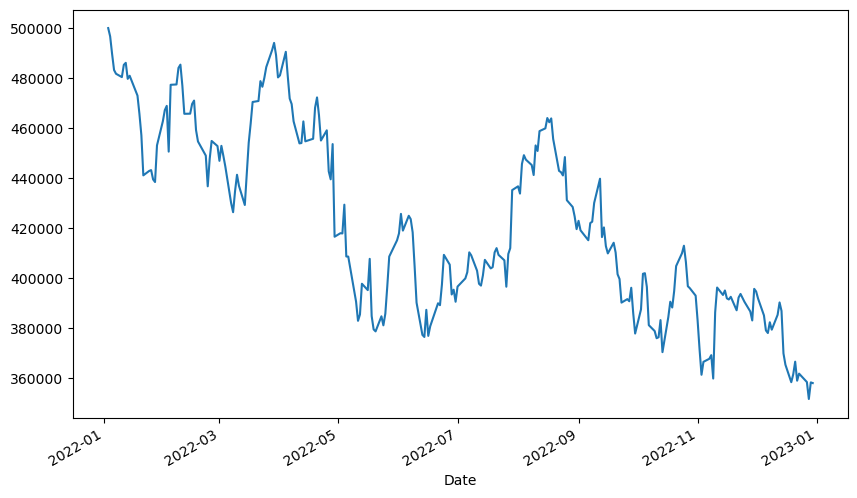

In [19]:
total_pos_vals = [aapl['Position Amount'], ibm['Position Amount'], amzn['Position Amount']]
portf_vals = pd.concat(total_pos_vals, axis = 1)
portf_vals.columns = ['Apple Pos', 'IBM Pos', 'Amazon Pos']
portf_vals['Total Pos'] = portf_vals.sum(axis=1)
portf_vals['Total Pos'].plot(figsize = (10,6))

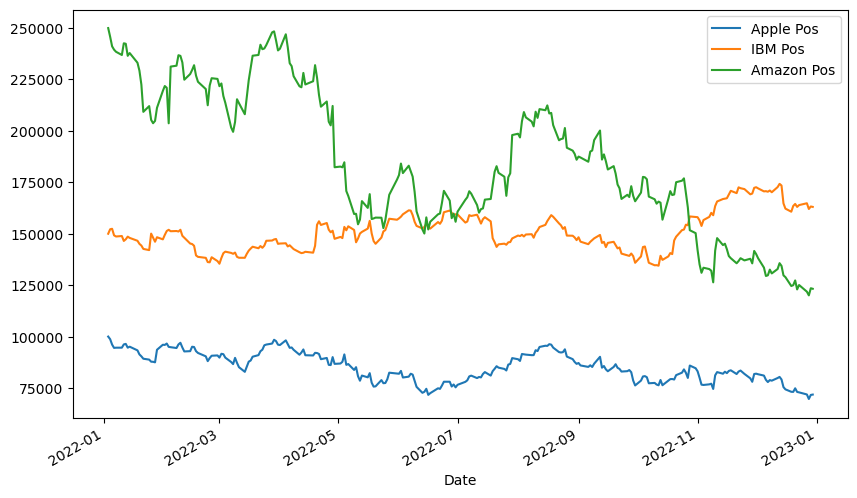

In [20]:
portf_vals['2020-01-01':].drop('Total Pos', axis = 1).plot(figsize=(10,6));

## Portfolio Statistics

In [21]:
portf_vals['Daily Return'] = portf_vals['Total Pos'].pct_change(1)
portf_vals.dropna(inplace = True)
print('Daily Return Average: ',portf_vals['Daily Return'].mean())
print('Daily Return Standard Deviation: ',portf_vals['Daily Return'].std())

Daily Return Average:  -0.0011372949967127313
Daily Return Standard Deviation:  0.019870757738034355


To look at the distribution, let's take a look at a histogram and a KDE plot:

<AxesSubplot:ylabel='Density'>

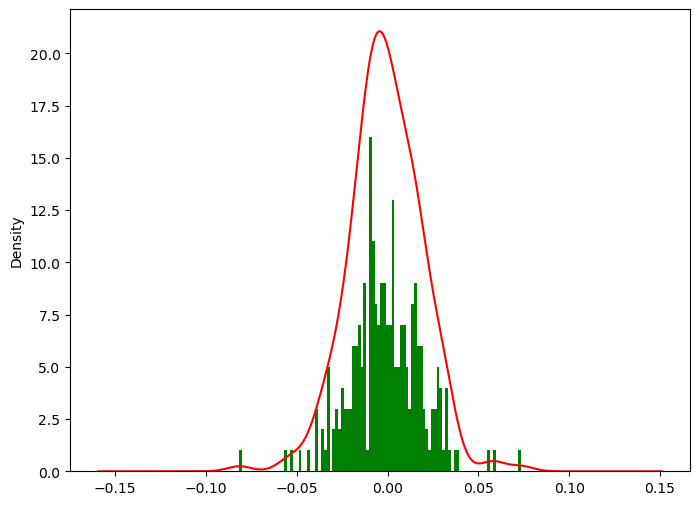

In [22]:
portf_vals['Daily Return'].plot(kind = 'hist', bins=100, figsize = (6,8), color = 'green')
portf_vals['Daily Return'].plot(kind = 'kde', figsize = (8,6), color = 'r')

In [23]:
cumulative_return = 100*(portf_vals['Total Pos'][-1]/portf_vals['Total Pos'][0]-1)
print('Cumulative return: ', cumulative_return)

Cumulative return:  -27.904263738741044


## Sharpe Ration

In [24]:
SR = portf_vals['Daily Return'].mean()/portf_vals['Daily Return'].std()
print('Sharpe Ration = ', SR)

Sharpe Ration =  -0.05723460633490841


In [25]:
#Annual Sharpe Ratio:
ASR = (252**0.5) * SR
print('Annualized Sharpe Ratio = ', ASR)

Annualized Sharpe Ratio =  -0.9085712084930979


Now let's allocate our securities in a most optimal way:

In [26]:
stocks = pd.concat([aapl['Adj Close'], ibm['Adj Close'], amzn['Adj Close']], axis = 1)
stocks.columns = ['Apple', 'IBM', 'Amazon']
stocks.head()

,Apple,IBM,Amazon
Date,,,
2022-01-03,179.953873,123.479324,170.404495
2022-01-04,177.669968,125.276497,167.522003
2022-01-05,172.943985,125.458054,164.356995
2022-01-06,170.056992,122.843956,163.253998
2022-01-07,170.225037,122.381050,162.554001


To calculate Mean Daily Return:

In [27]:
stocks.pct_change(1).mean()

Apple    -0.001074
IBM       0.000446
Amazon   -0.002329
dtype: float64

To calculate correlation between stocks:

In [28]:
stocks.pct_change(1).corr()

,Apple,IBM,Amazon
Apple,1.000000,0.489357,0.695904
IBM,0.489357,1.000000,0.310198
Amazon,0.695904,0.310198,1.000000


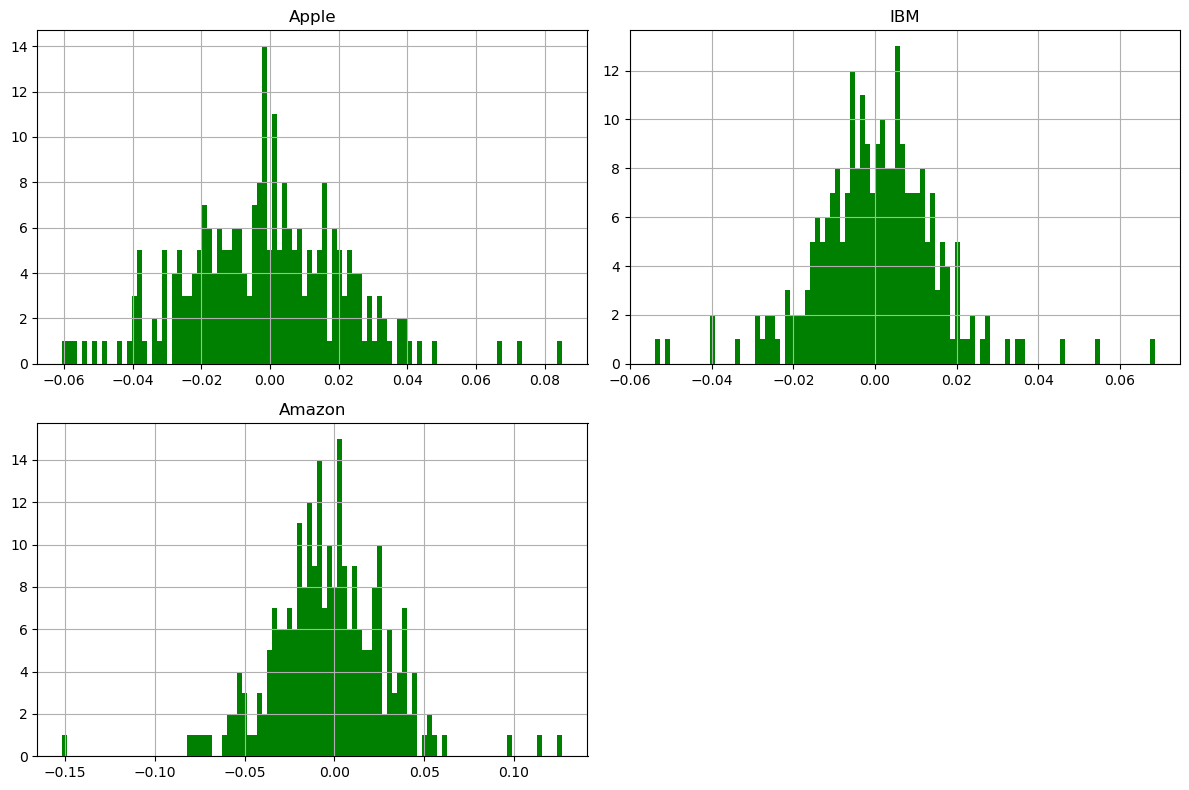

In [29]:
log_returns = np.log(stocks/stocks.shift(1))
log_returns.hist(bins = 100, figsize = (12,8), color = 'g')
plt.tight_layout()

Covarience of the columns:

In [30]:
log_returns.cov()*252

,Apple,IBM,Amazon
Apple,0.126811,0.041632,0.124751
IBM,0.041632,0.056620,0.037518
Amazon,0.124751,0.037518,0.251690


## Sharpe Ration for One Portfolio

In [31]:
np.random.seed(101)
print(stocks.columns)

weights = np.array(np.random.random(3))

print('Random Weights: ')
print(weights)

#However, their sum must be equal to 100
print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

Index(['Apple', 'IBM', 'Amazon'], dtype='object')
Random Weights: 
[0.51639863 0.57066759 0.02847423]
Rebalance
[0.46291341 0.51156154 0.02552505]


Expected Return:

In [32]:
exp_ret = np.sum((log_returns.mean() * weights) * 252)
print('Expected Portfolio Return: ',exp_ret)

Expected Portfolio Return:  -0.12975667000827865


Expected Volatility or Expected 

In [33]:
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights)))
print('Expected Volatility: ', exp_vol)

Expected Volatility:  0.2565166247450109


The Sharpe Ratio:

In [34]:
SR = exp_ret/exp_vol
print('Sharpe Ratio: ', SR)

Sharpe Ratio:  -0.5058411716482806


# Choosing an optimal portfolio allocation.

In [35]:
num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.array(np.random.random(3))
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    ret_arr[ind] = np.sum((log_returns.mean() * weights) *252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [36]:
sharpe_arr.max()

0.3401483607536256

Index location for the best allocation:

In [37]:
sharpe_arr.argmax()

4696

Here is the optimal allocation for our portfolio

In [38]:
all_weights[sharpe_arr.argmax(),:]

array([0.00404045, 0.99393482, 0.00202473])

Let's plot the data:

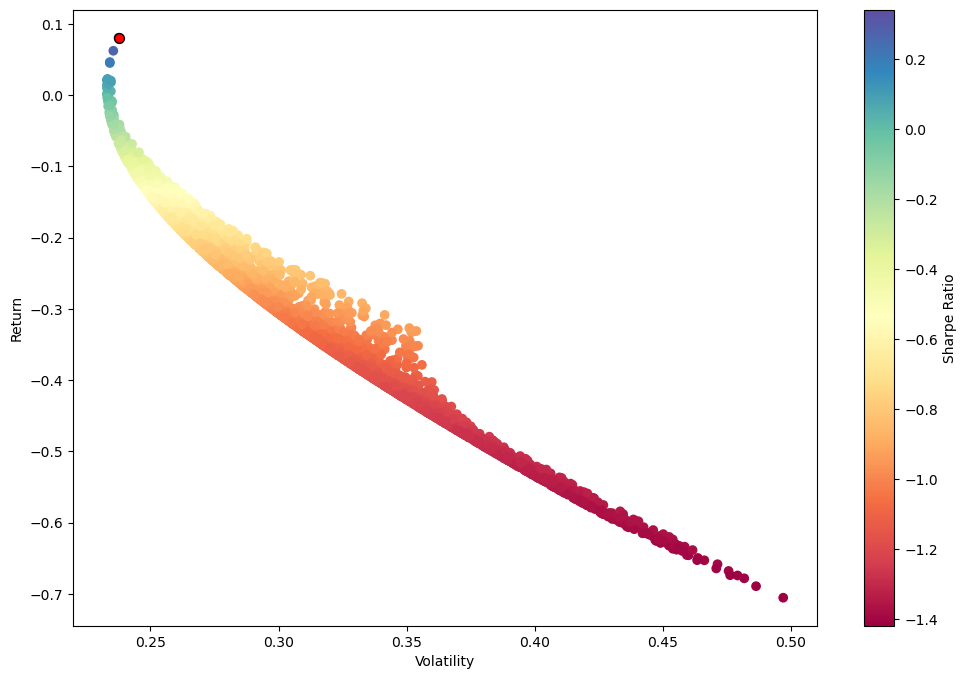

In [39]:
plt.figure(figsize = (12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='Spectral')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');